# 2 Subfind Catalogues

### 2.1  
Using the function Subfind of InspectorGadget, compute the halo mass function and
the stellar mass function and establish the maximum and minimum halo masses that
are resolved in the simulation.

In [1]:
#librerías
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gadget 

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:
#And the "*Type" fields (with 6 entries) are the same numbering as the snapshots (0=gas, 1=dm, 4=stars+wind, 5=bhs).

sub=gadget.Subfind("Data/groups_015/fof_subhalo_tab_015.0.hdf5")

In [3]:
#print(sub)

#sub.subhalo.SubhaloCM
#print(sub.subhalo)
#print(sub.subhalo.SubhaloMassType)
Mass_halo=sub.subhalo.SubhaloMass #masa de los subhalos
len(Mass_halo)
contador=[]
Masa_halo_corregido=[] #Hay datos que dañan la muestra(muy grande), estos datos no se tendran en cuenta en este arreglo
#print(Mass_halo)
for i in range(1,len(Mass_halo)):
        
        contador.append(i)
        Masa_halo_corregido.append(Mass_halo[i])
        #Mass_sin_primer_dato.appen    
       
    
contador=np.array(contador)
print(len(Masa_halo_corregido))

def funcion(x,A,a,b):
    """ modelo para nuestro dato """
    
    #return stats.poisson.cdf(x,mu)
    return A*x**a+b

#popt, pcov = curve_fit(funcion, contador, Masa_halo_corregido)

#print(popt)  #popt son los valores de A y B por el ajuste  
#print(np.sqrt(np.diag(pcov))) ## errores de A y B respectivamente



318


(array([ 2,  2,  0, 71, 57, 53, 37, 27, 15, 17, 16,  7,  3,  4,  3,  2,  2]), array([-1.51557982, -1.31892914, -1.12227846, -0.92562778, -0.7289771 ,
       -0.53232642, -0.33567574, -0.13902506,  0.05762562,  0.2542763 ,
        0.45092698,  0.64757766,  0.84422834,  1.04087903,  1.23752971,
        1.43418039,  1.63083107,  1.82748175]))
17 18


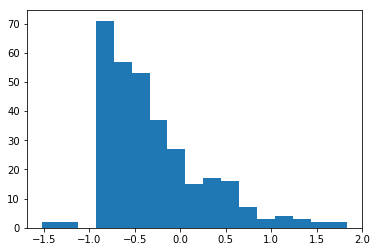

In [4]:

#plt.plot(contador, np.log(Masa_halo_corregido))
#plt.plot(contador,funcion(contador,popt[0],popt[1]))
#plt.ylim(-2,10)
#plt.xlabel("galaxia")
#plt.ylabel("log10(Mass_halo)")
#plt.show()
#bins=np.sqrt(len(Masa_halo_corregido))

histo_Masa_halo=np.histogram(np.log10(Masa_halo_corregido), bins=17)

#np.asarray(histo_Masa_halo)

print(histo_Masa_halo)
histo_Masa_halox=np.delete(histo_Masa_halo[1],-1)
print(len(histo_Masa_halo[0]),len(histo_Masa_halo[1]))

#popt, pcov = curve_fit(funcion, histo_Masa_halox,histo_Masa_halo[0])

x=np.arange(-1.5,2,0.1)
plt.hist(np.log10(Masa_halo_corregido), bins=17)
#plt.plot(x,funcion(popt[0],popt[1],popt[2]))
#plt.plot(histo_Masa_halox,funcion(histo_Masa_halox,*popt))
plt.show()

## 2.2)

319
318


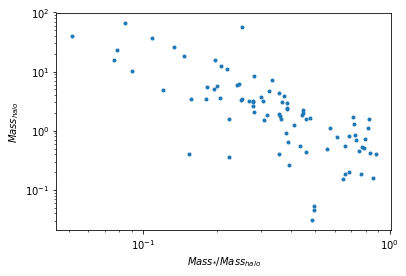

In [5]:
##Masa de halos halos
Mass_halo

#print(len(sub.subhalo.SubhaloStellarPhotometricsMassInRad))
#print(sub.subhalo.SubhaloStellarPhotometricsMassInRad)
print(len(sub.subhalo.SubhaloMassInHalfRad)) ## tomare este subHalo como el halo para  la masa estelar

Mass_stellar= sub.subhalo.SubhaloMassInHalfRad
#print(Mass_stellar)
#Delet date beloging the parent 

Mass_stellar=np.delete(Mass_stellar,[0])
print(len(Mass_stellar))
plt.loglog((Mass_stellar/Masa_halo_corregido),Masa_halo_corregido,".") ##Mass_{halo}(Mass_{*}/Mass_{halo})
plt.xlabel("$Mass_{*}/Mass_{halo}$")
plt.ylabel("$Mass_{halo}$")
plt.show()

## 2.3)

In [7]:
filter=[gadget.filter.Halo(sub,halo=0),gadget.filter.Stars()] ##used the Black holes as stars

sn_bh = gadget.Snapshot('./Data/groups_015/fof_subhalo_tab_015.0.hdf5', parttype=[5], filter=filter, combineFiles=True, verbose=True)


AttributeError: unknown field 'NumPart_Total'